# Regression between sea level height and the dangendorf wind proxies for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [25]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'historical'
model = 'Dangendorf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot cmip6 sea level (zos) and pressure data historical

In [26]:
zos = imprt.import_cmip6_slh_data()

In [27]:
pres_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

### Plot data

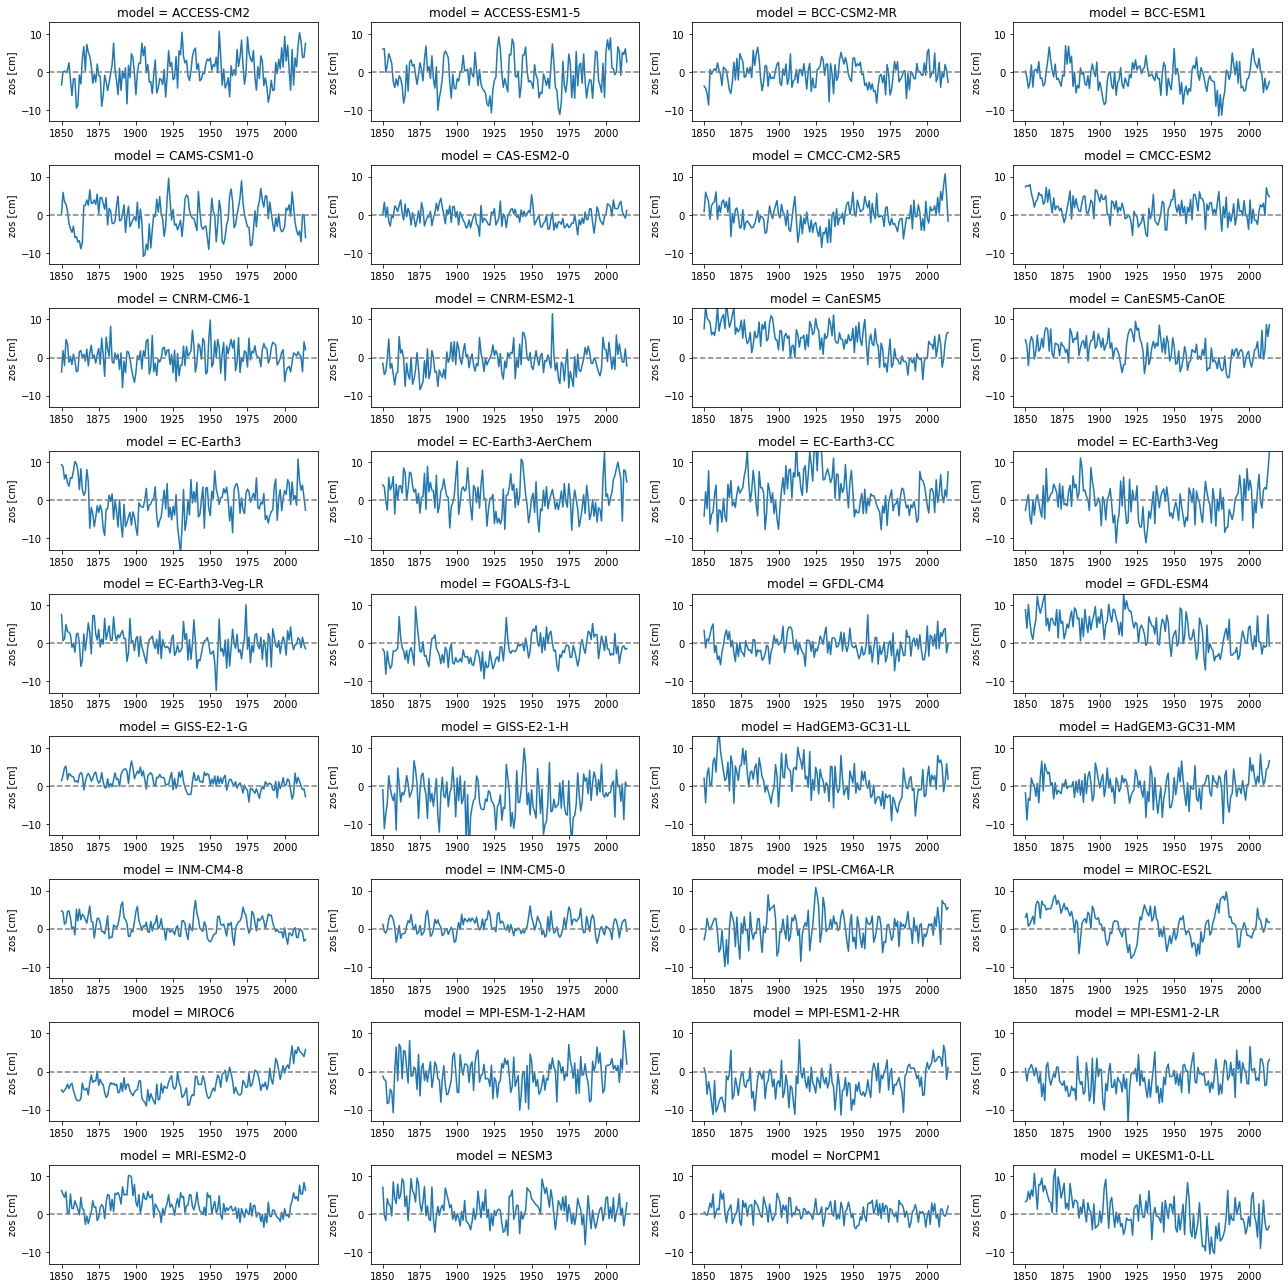

In [28]:
figs.plot_zos_data_per_model(zos, data_type)

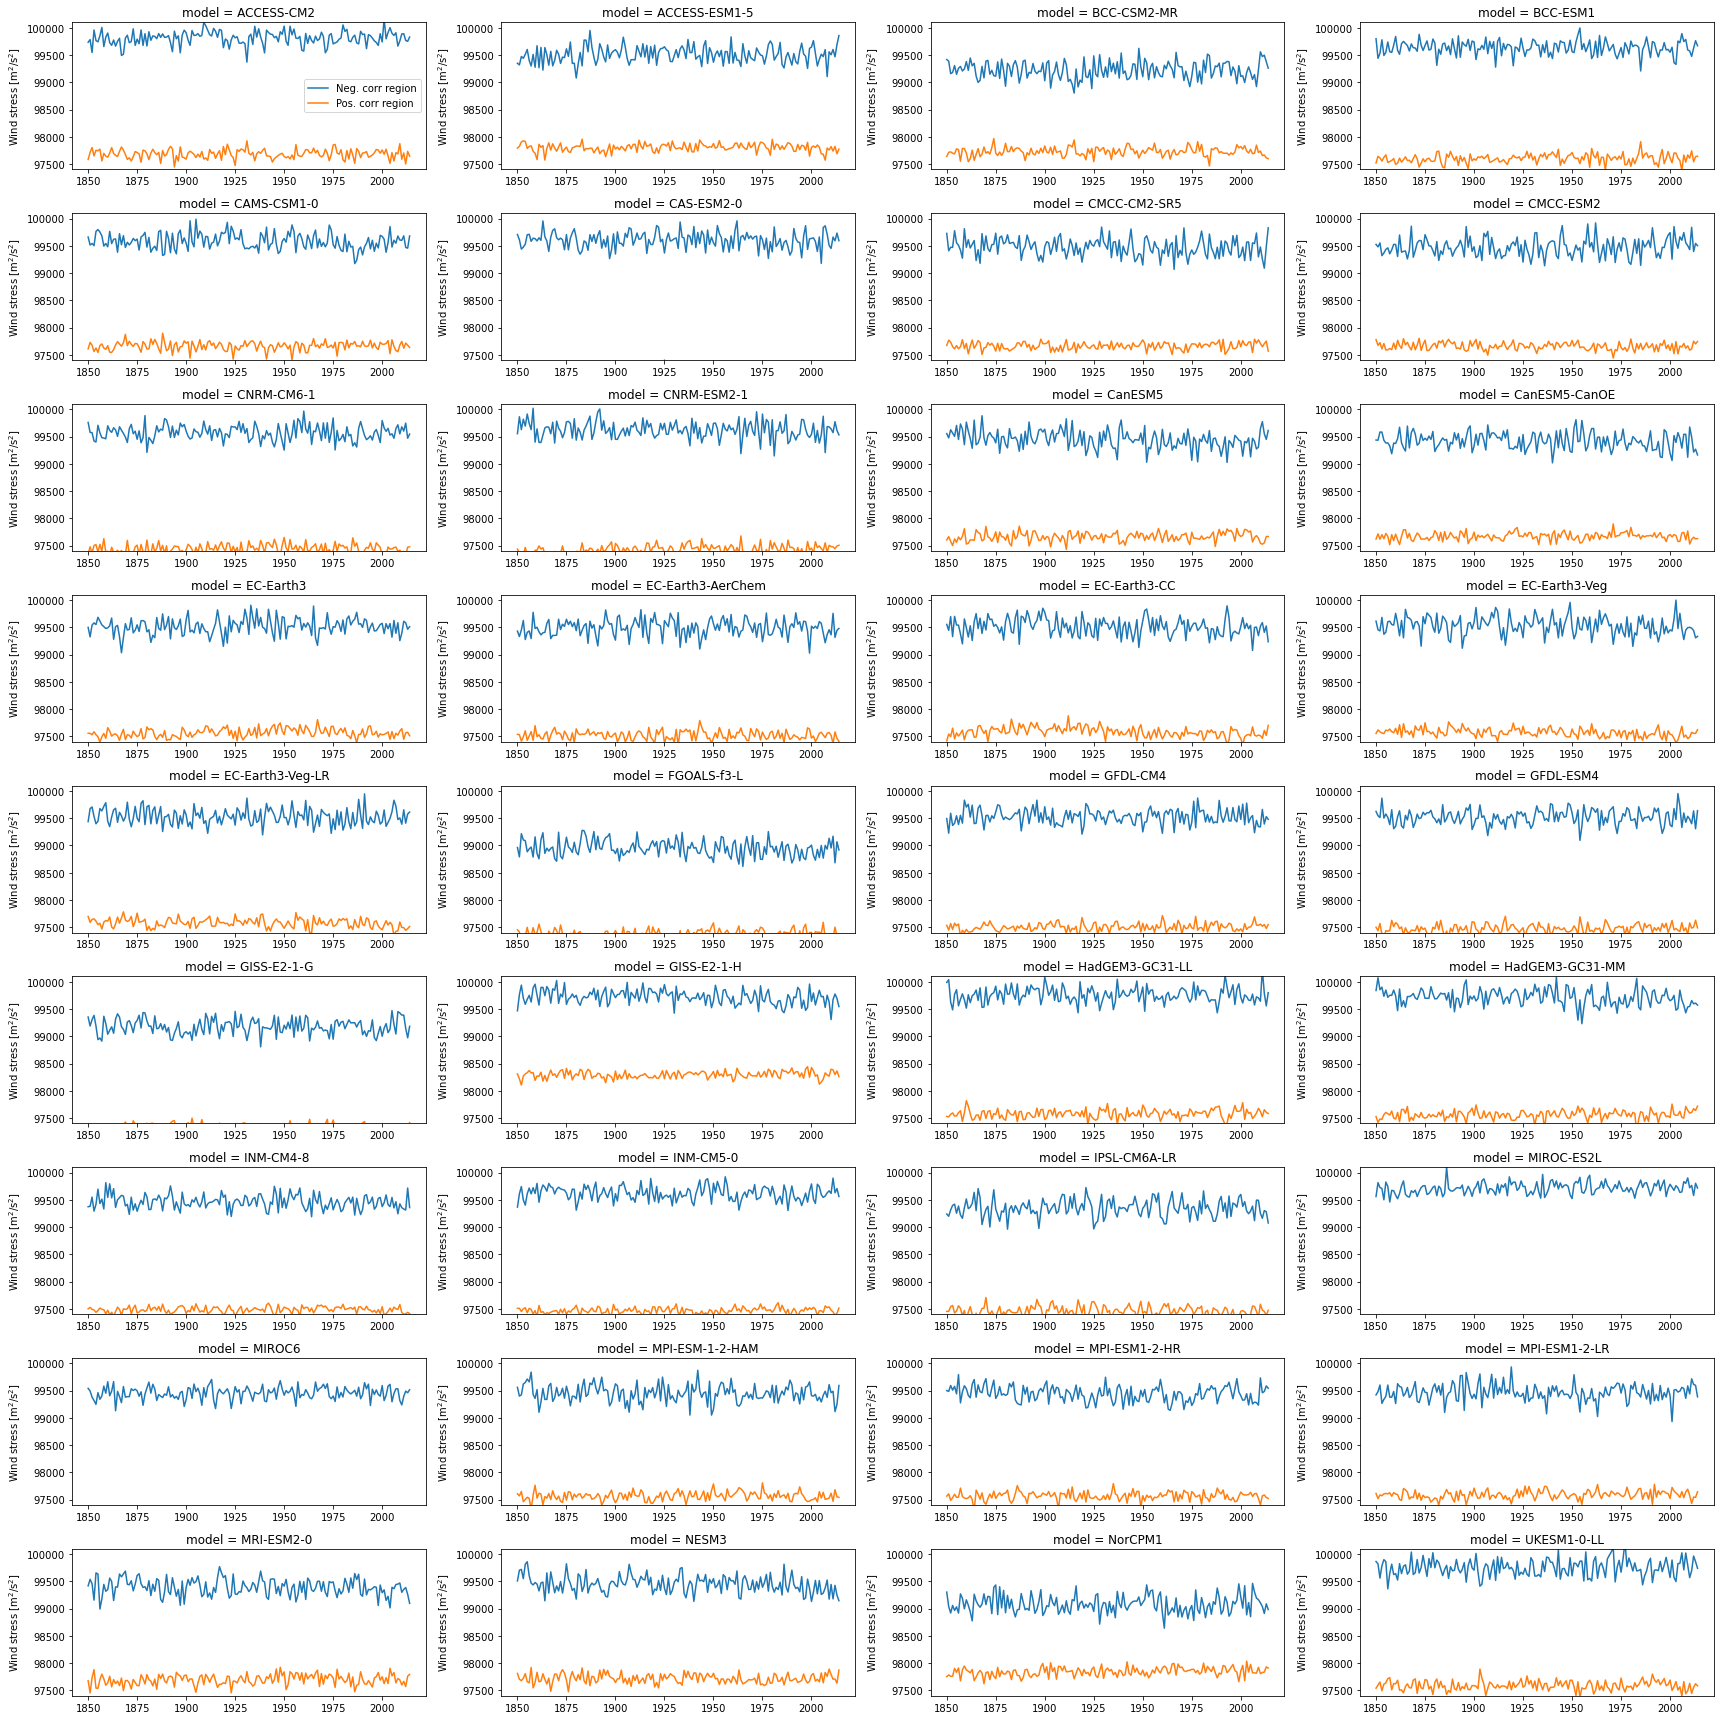

In [29]:
figs.plot_cmip6_wind_data_per_model(pres_data, model, data_type)

### Perform regression

In [30]:
results, timeseries, significance = regres.regression_cmip6(pres_data, zos, wind_model = model, data_type = data_type)

In [31]:
timeseries 

<xarray.Dataset>
Dimensions:          (model: 36, station: 7, time: 165)
Coordinates:
  * time             (time) int64 1850 1851 1852 1853 ... 2011 2012 2013 2014
  * station          (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model            (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
Data variables:
    neg_corr_region  (model, station, time) float64 0.3922 0.1468 ... 0.1214
    pos_corr_region  (model, station, time) float64 -0.8415 0.2474 ... -0.08443
    trend            (model, station, time) float64 -2.464 -2.433 ... -5.855
    total            (model, station, time) float64 -2.913 -2.039 ... -5.818
    wind_total       (model, station, time) float64 -0.4493 0.3941 ... 0.03698

In [32]:
results

<xarray.Dataset>
Dimensions:          (model: 36, station: 7)
Coordinates:
  * station          (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model            (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
Data variables:
    r2               (model, station) float64 0.1951 0.1951 ... 0.7434 0.7385
    r2_wind          (model, station) float64 0.1015 0.1015 ... 0.5042 0.4126
    r2_neg           (model, station) float64 0.06791 0.06791 ... 0.4567 0.3608
    r2_pos           (model, station) float64 0.09045 0.09045 ... 0.2727 0.2453
    rmse             (model, station) float64 3.333 3.333 3.46 ... 2.494 2.402
    constant         (model, station) float64 0.5729 0.5729 ... -0.6696 -0.361
    neg_corr_region  (model, station) float64 -0.6329 -0.6329 ... -2.334 -1.794
    pos_corr_region  (model, station) float64 0.7031 0.7031 1.13 ... 1.3 1.308
    trend            (model, station) float64 1.431 1.431 1.35 ... -3.057 -3.401

In [33]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

,Negative corr region,Positive corr region,trend,total,wind total
model,,,,,
ACCESS-CM2,True,True,True,True,True
ACCESS-ESM1-5,False,True,False,True,True
BCC-CSM2-MR,False,True,False,True,True
BCC-ESM1,False,False,True,True,True
CAMS-CSM1-0,True,True,False,True,True
CAS-ESM2-0,True,True,True,True,True
CMCC-CM2-SR5,True,True,False,True,True
CMCC-ESM2,True,True,True,True,True
CNRM-CM6-1,True,True,False,True,True


#### Plot regression results

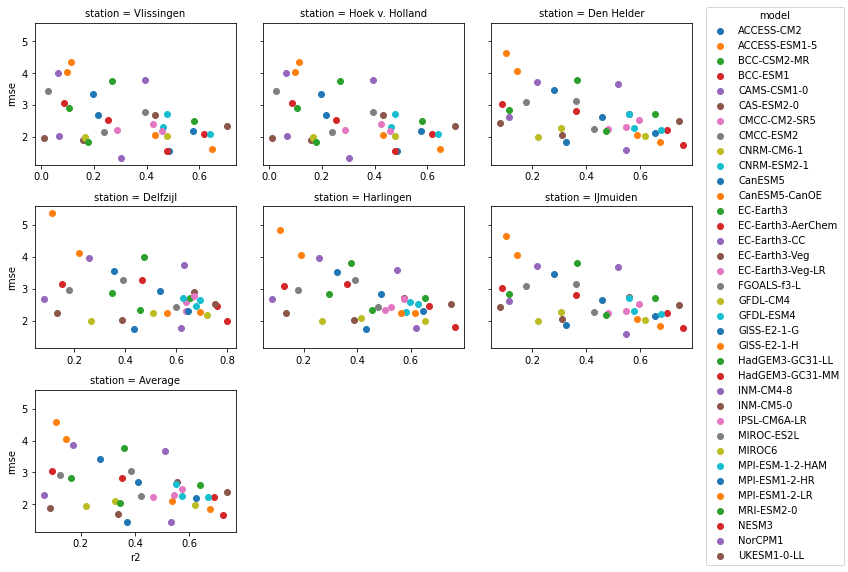

In [34]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

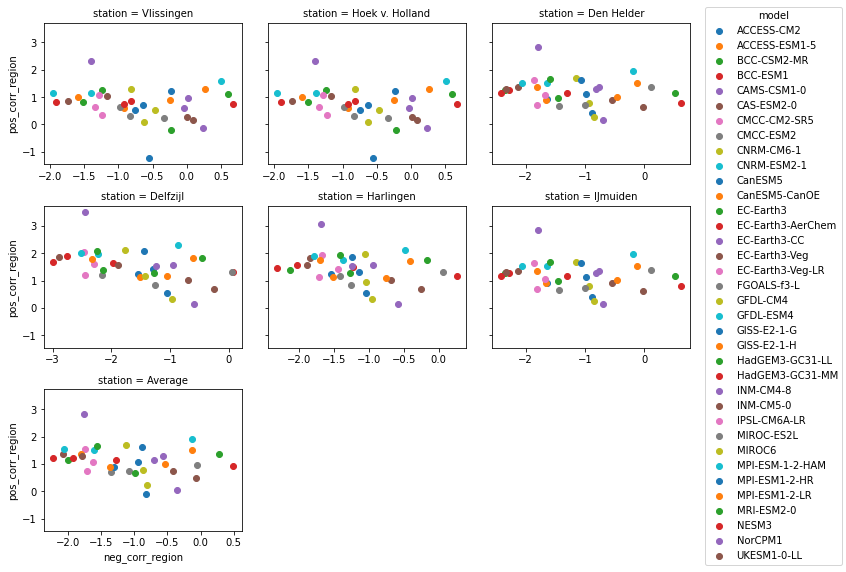

In [35]:
figs.plot_cmip6_two_variables(results, 'neg_corr_region', 'pos_corr_region', data_type)

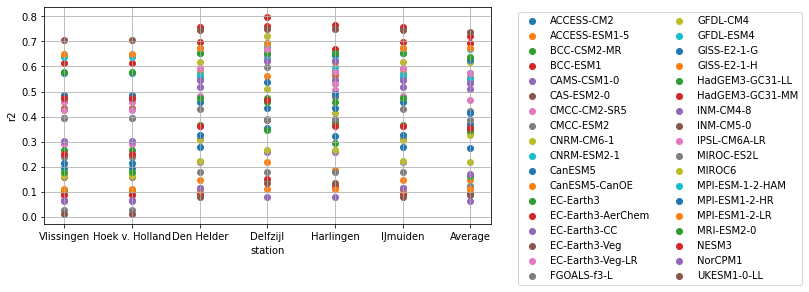

In [36]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type)

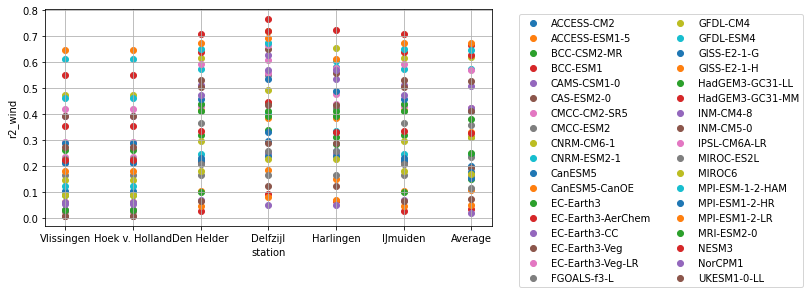

In [37]:
figs.plot_cmip6_result_per_station(results, 'r2_wind', data_type)

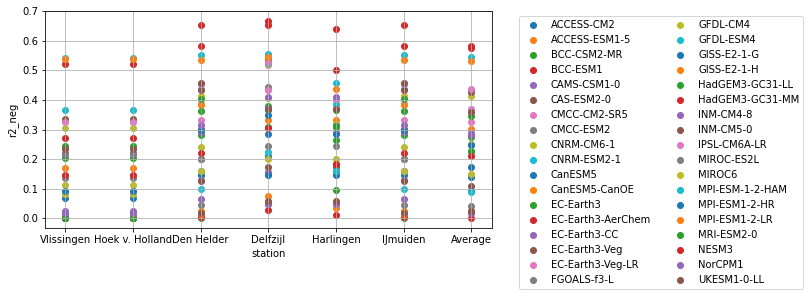

In [38]:
figs.plot_cmip6_result_per_station(results, 'r2_neg', data_type)

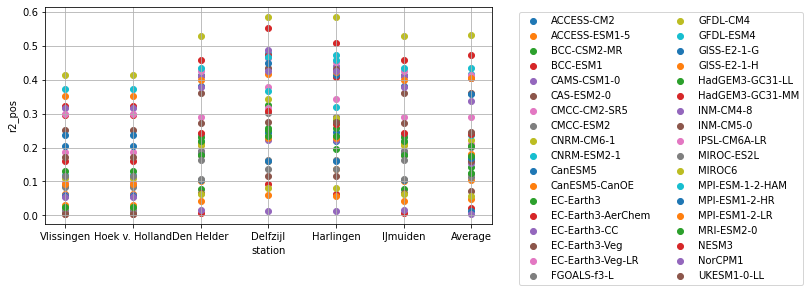

In [39]:
figs.plot_cmip6_result_per_station(results, 'r2_pos', data_type)

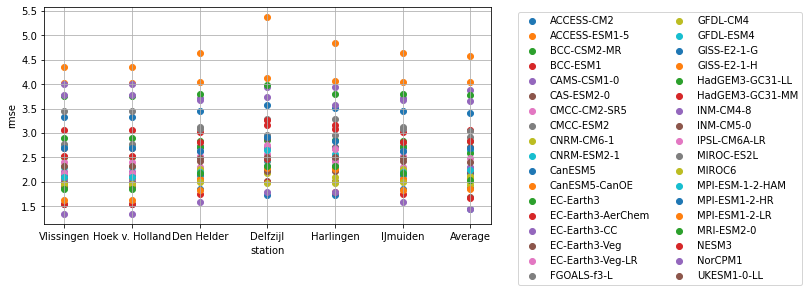

In [40]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

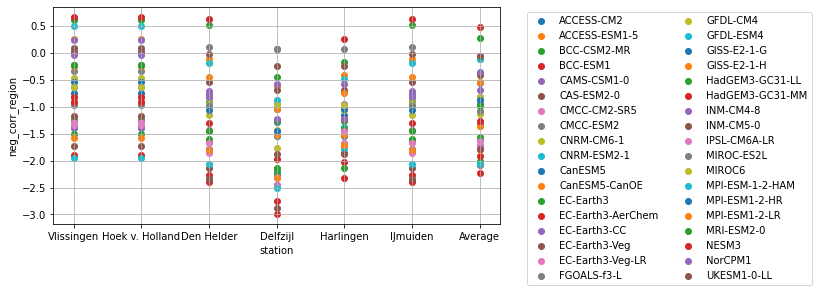

In [41]:
figs.plot_cmip6_result_per_station(results, 'neg_corr_region', data_type)

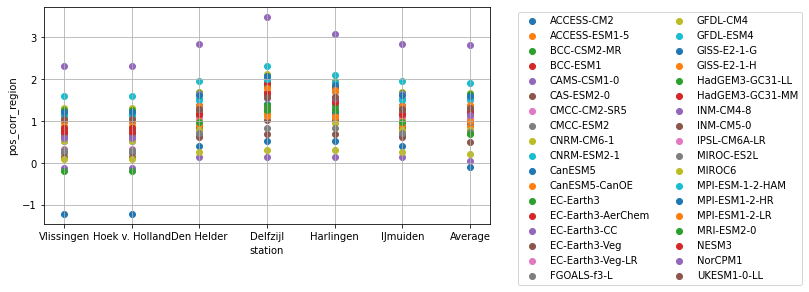

In [42]:
figs.plot_cmip6_result_per_station(results, 'pos_corr_region', data_type)

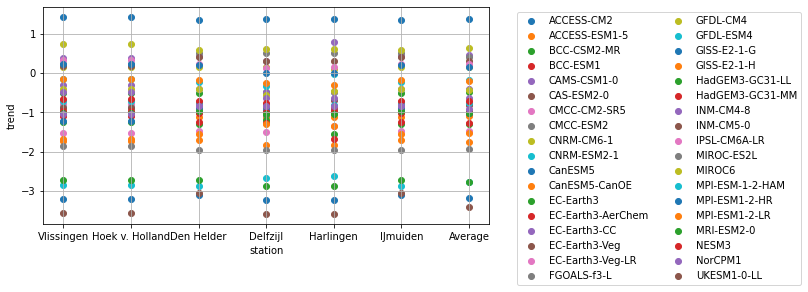

In [43]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type)

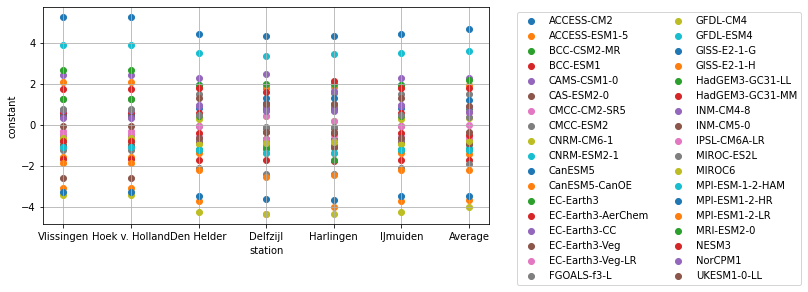

In [44]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

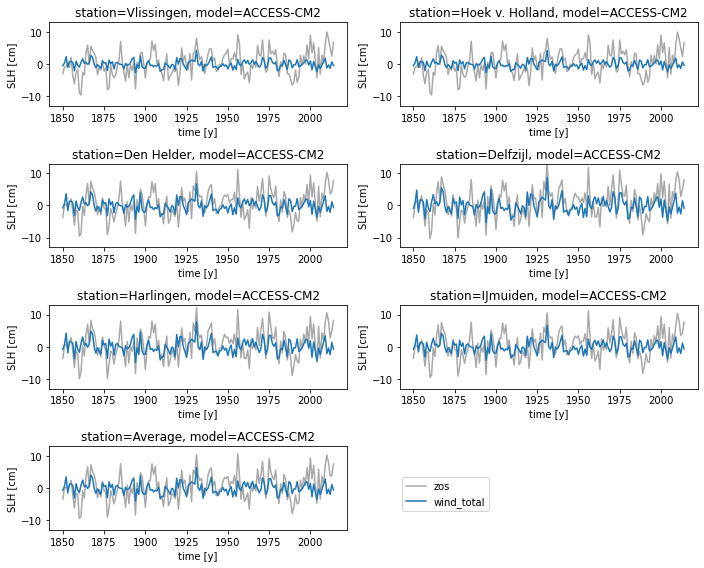

In [45]:
figs.plot_cmip6_timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['wind_total'])

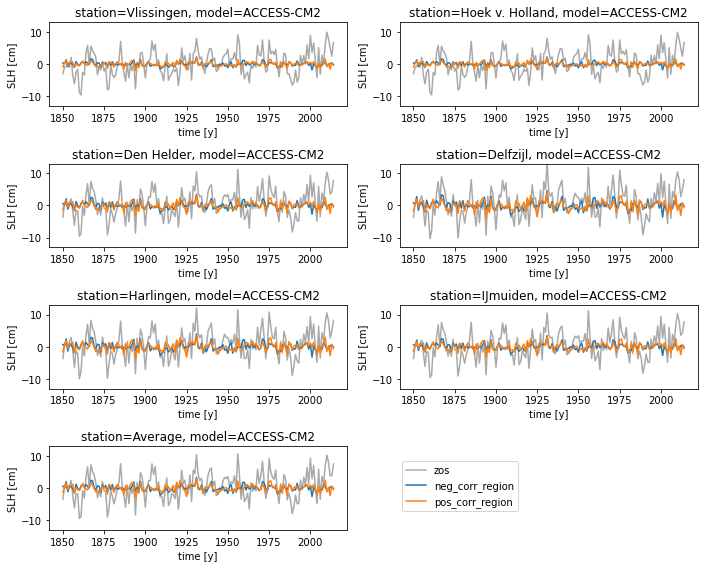

In [46]:
figs.plot_cmip6_timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['neg_corr_region', 'pos_corr_region'])

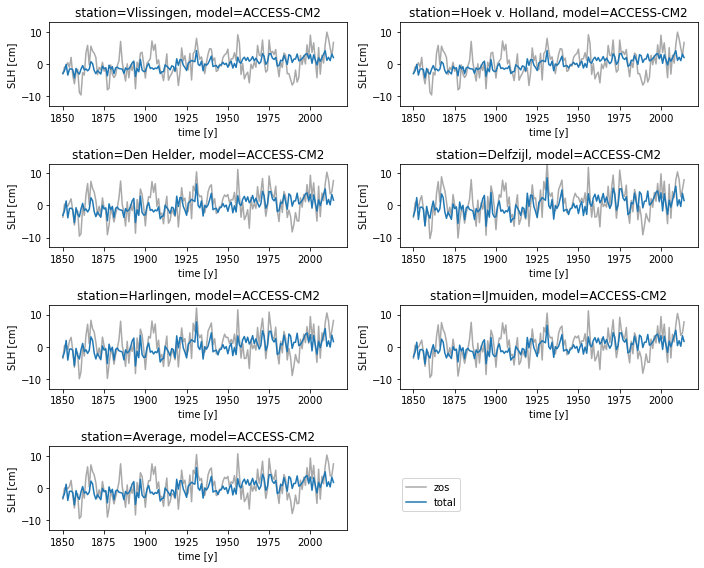

In [47]:
figs.plot_cmip6_timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['total'])

#### Plot trends

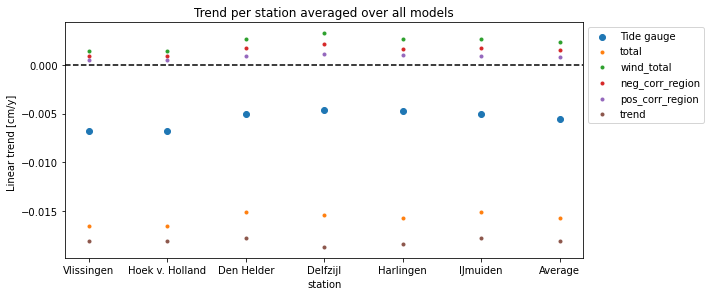

In [48]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'neg_corr_region', 'pos_corr_region', 'trend'], model, data_type, errorbar = False)